# Работа №6 (2022-09-28)
Реализовать с использованием потоков и процессов скачивание файлов из интернета.
Список файлов для скачивания подготовить самостоятельно
(например изображений, не менее 100 изображений или других объектов).
Сравнить производительность с последовательным методом.
Сравнивть производительность Thread и multiprocessing решений.
Попробовать подобрать оптимальное число потоков/процессов.

In [20]:
from UrlProvider import UrlProviderFile
from DownloadService import DownloadServiceSerial
from DownloadService import DownloadServiceThreadPool
from DownloadService import DownloadServiceMultiprocessing
from DownloadService import Result

In [21]:
# получить сервис который предоставит список ссылок
urlProvider = UrlProviderFile('urls.txt')

Запускаем скачивание файлов в последовательном режиме

In [22]:
result = DownloadServiceSerial(urlProvider).download()
print(result)

Files: 200 Downloading... 
urls handled: 200 in 1 threads, execution time: 7.46392822265625 ms


Запускаем скачивание файлов с помощью пула потоков

In [23]:
results = []
for i in range(1, 20):
    result = DownloadServiceThreadPool(urlProvider, i*4).download()
    print(result)
    results.append(result)

Files: 200 Downloading... 
urls handled: 200 in 4 threads, execution time: 3.475315570831299 ms
Files: 200 Downloading... 
urls handled: 200 in 8 threads, execution time: 3.061180591583252 ms
Files: 200 Downloading... 
urls handled: 200 in 12 threads, execution time: 2.3796420097351074 ms
Files: 200 Downloading... 
urls handled: 200 in 16 threads, execution time: 2.3187811374664307 ms
Files: 200 Downloading... 
urls handled: 200 in 20 threads, execution time: 2.0734403133392334 ms
Files: 200 Downloading... 
urls handled: 200 in 24 threads, execution time: 2.117968797683716 ms
Files: 200 Downloading... 
urls handled: 200 in 28 threads, execution time: 2.1716928482055664 ms
Files: 200 Downloading... 
urls handled: 200 in 32 threads, execution time: 2.136054039001465 ms
Files: 200 Downloading... 
urls handled: 200 in 36 threads, execution time: 2.1182079315185547 ms
Files: 200 Downloading... 
urls handled: 200 in 40 threads, execution time: 2.165525436401367 ms
Files: 200 Downloading... 


Строим зависимость размер Thread Pool и время скачивания 300 файлов

<AxesSubplot:>

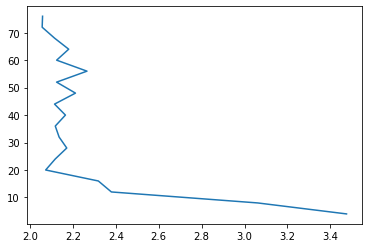

In [24]:
Result.to_series(results).plot()

Запускаем скачивание файлов с помощью multiprocessing

In [25]:
results = []
for i in range(1, 20):
    result = DownloadServiceMultiprocessing(urlProvider, i*4).download()
    print(result)
    results.append(result)

Files: 200 Downloading... 
urls handled: 200 in 4 threads, execution time: 3.2428858280181885 ms
Files: 200 Downloading... 
urls handled: 200 in 8 threads, execution time: 2.6260428428649902 ms
Files: 200 Downloading... 
urls handled: 200 in 12 threads, execution time: 2.3539071083068848 ms
Files: 200 Downloading... 
urls handled: 200 in 16 threads, execution time: 2.2638978958129883 ms
Files: 200 Downloading... 
urls handled: 200 in 20 threads, execution time: 2.263068675994873 ms
Files: 200 Downloading... 
urls handled: 200 in 24 threads, execution time: 2.1281213760375977 ms
Files: 200 Downloading... 
urls handled: 200 in 28 threads, execution time: 2.174463987350464 ms
Files: 200 Downloading... 
urls handled: 200 in 32 threads, execution time: 2.2008512020111084 ms
Files: 200 Downloading... 
urls handled: 200 in 36 threads, execution time: 2.3564324378967285 ms
Files: 200 Downloading... 
urls handled: 200 in 40 threads, execution time: 2.167240858078003 ms
Files: 200 Downloading...

<AxesSubplot:>

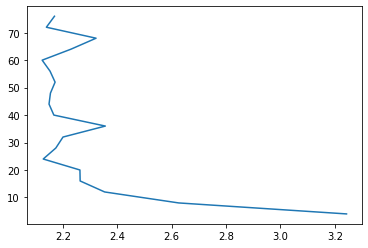

In [26]:
Result.to_series(results).plot()

### Выводы
1. Последовательный метод
* самый медленный, но экономит ресурсы памяти, процессора и сети

2. Скачивание с помощью пула потоков
* намного быстрее последовательного скачивания, но производительность растет только до определенного количества потоков, а при большом количестве потоков производительность падает, по графикам видно что производительность росла до пулла размером в 20 потоков что близко к рекомендованому максимуму (количество_потоков_процессора * 2). Но также расход ресурсов компьютера и сети выше
3. Скачивание с помощью multiprocessing
* похоже более тяжеловестное решение происходит просадка производительности на 8 потоках, что соответсвует количеству физических потоков компьютера